In [26]:
import pygame as pg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
modules_init_and_not_init = pg.init()

### pg.init()

- Purpose: Initializes all the imported Pygame modules.

- Explanation:

    - Pygame consists of multiple submodules for various functionalities like graphics, sound, input handling, etc.
    - Calling pg.init() initializes all the modules that are part of Pygame at once (if possible).
    - If a module cannot be initialized, it will not raise an error but will simply not be ready for use.

-Returns:

    - A tuple containing two values:
    - The number of modules that were successfully initialized.
    - The number of modules that failed to initialize.

In [3]:
modules_init_and_not_init

(5, 0)

- 5 - The number of modules that were successfully initialized.
- 0 - The number of modules that failed to initialize.

In [4]:
pg.mixer.init()

### pg.mixer.init()

- Purpose: Initializes the mixer module, which is used for handling and playing sounds and music in Pygame.

- Explanation:

    - The mixer module allows you to play sound effects and music files.
    - pg.mixer.init() sets up the sound system (audio device) with default or user-defined parameters like frequency, size, channels, and buffer size.
    - This initialization must be done before you can use sound-related functions, like loading or playing audio.

- Optional Parameters:

    - frequency: The sampling frequency (default is 22050 Hz).
    - size: The size of a sample (default is -16, meaning 16-bit signed).
    - channels: Number of audio channels (default is 2 for stereo).
    - buffer: The size of the audio buffer (default is 4096).

### pg.mixer.init() does not return any value; it simply initializes the Pygame mixer module.

## Producing the Cosine Wave

In [5]:
sampling_rate = 44100 # Default sampling rate of the pygame mixer
frequency = 440 # Hz
duration = 1.5 # Sec

### Sampling Rate

- sampling_rate = 44100
    - Definition: The sampling rate is the number of audio samples captured or played per second. It is measured in Hertz (Hz).
    - Value: 44100 Hz (44.1 kHz) is the default sampling rate for high-quality audio. It is commonly used for music and is the standard used in CDs.

- Explanation:
    - In digital audio, sound is represented by discrete samples.
    - A higher sampling rate results in better sound quality but increases file size and computational requirements.
    - For most purposes, 44100 Hz is a good trade-off between quality and performance.

### Frequency

- frequency = 440
    - Definition: The frequency of the sound wave in Hertz (Hz).
    - Value: 440 Hz corresponds to the musical note A4.

- Explanation:
    - Frequency determines the pitch of the sound.
    - A higher frequency results in a higher-pitched sound, while a lower frequency produces a lower-pitched sound.
    In music, 440 Hz is widely used as the tuning standard for the note A above middle C.

### Duration

- duration = 1.5
    - This parameter defines how long the sound will play.
    - Definition: The length of the sound in seconds.

In [6]:
frames = int(duration*sampling_rate) 

### Frames

- frames = int(duration * sampling_rate)
    - Definition: The total number of audio frames (or samples) that make up the sound.
    - Calculation:
    frames = duration × sampling_rate
    - In this case: frames = 1.5 × 44100 = 66150.

- Explanation:
    - Each frame corresponds to one audio sample.
    - The total number of frames tells you how many data points (samples) you need to generate or process to create a sound of the specified duration.
    - For a stereo sound, you would typically have double this number of values because each frame consists of two samples (one for each channel: left and right).

In [7]:
frames

66150

In [8]:
time_array = np.linspace(0, 1.5, 66150)

In [9]:
time_array

array([0.00000000e+00, 2.26760798e-05, 4.53521595e-05, ...,
       1.49995465e+00, 1.49997732e+00, 1.50000000e+00])

### Time Array

- np.linspace(0, duration, frames)
    - Purpose: Creates a linearly spaced array of time values.

- Explanation:

- np.linspace(start, stop, num): Generates num equally spaced values between start and stop (inclusive).

    - start = 0: The time starts at 0 seconds.
    - stop = duration: The time ends at duration seconds. (1.5 seconds)
    - num = frames: The total number of time points (samples) corresponds to the number of frames, calculated earlier as frames = int(duration * sampling_rate). (66150)
    
- This produces a time array, where each value represents a moment in time for one frame/sample.

### Frequency to Radians 

In [14]:
# frequency = 440 Hz

# radians = 2 * np.pi * 440 ≈ 2764.6 radians/second

radians = 2 * np.pi * 440

radians

2764.601535159018

### 2 * np.pi * frequency

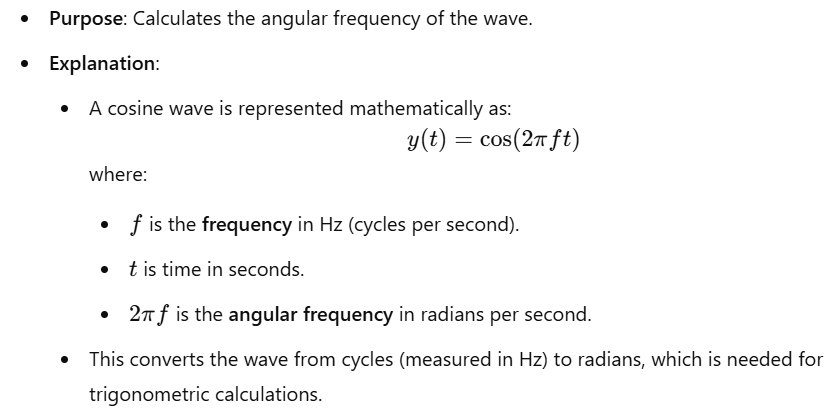

In [21]:
wave_phases = 440 * time_array

### frequency * np.linspace(0, 1.5, 66150)

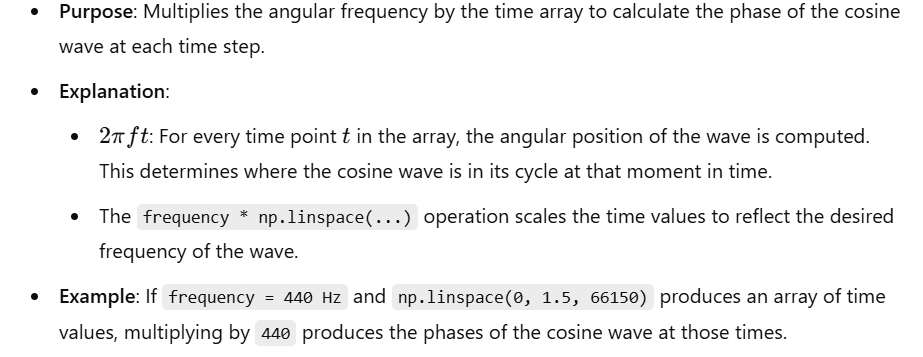

In [13]:
wave_phases

array([0.00000000e+00, 9.97747509e-03, 1.99549502e-02, ...,
       6.59980045e+02, 6.59990023e+02, 6.60000000e+02])

In [19]:
time_array.shape

(66150,)

In [20]:
wave_phases[66149]

660.0

In [24]:
time_arr = np.linspace(0,duration, frames)
print(f"Time Array : {time_arr}, Shape : {time_arr.shape}")
wave_phases_in_freq_Hz_time_arr = 440 * time_arr
print(f"Wave Phases for Time Array in Hz : {wave_phases_in_freq_Hz_time_arr}, Shape : {wave_phases_in_freq_Hz_time_arr.shape}")
wave_phases_in_radians_time_arr = 2 * np.pi * 440 * time_arr
print(f"Wave Phases for Time Array in Radians : {wave_phases_in_radians_time_arr}, Shape : {wave_phases_in_radians_time_arr.shape}")
cos_wave_phases_in_radians_time_arr = np.cos(2 * np.pi * 440 * time_arr)
print(f"Cosine Wave Phases for Time Array in Radians : {cos_wave_phases_in_radians_time_arr}, Shape : {cos_wave_phases_in_radians_time_arr.shape}")

Time Array : [0.00000000e+00 2.26760798e-05 4.53521595e-05 ... 1.49995465e+00
 1.49997732e+00 1.50000000e+00], Shape : (66150,)
Wave Phases for Time Array in Hz : [0.00000000e+00 9.97747509e-03 1.99549502e-02 ... 6.59980045e+02
 6.59990023e+02 6.60000000e+02], Shape : (66150,)
Wave Phases for Time Array in Radians : [0.00000000e+00 6.26903249e-02 1.25380650e-01 ... 4.14677692e+03
 4.14683961e+03 4.14690230e+03], Shape : (66150,)
Cosine Wave Phases for Time Array in Radians : [1.         0.99803561 0.99215014 ... 0.99215014 0.99803561 1.        ], Shape : (66150,)


### np.cos(2 * np.pi * frequency * np.linspace(0,duration, frames))

- Purpose: Applies the cosine function to the computed angular positions to generate the wave.

- Explanation:
    - The cosine function computes the value of the wave at each time step. The result is a NumPy array of amplitude values representing the wave.
    - The values oscillate between -1 and 1, forming the characteristic shape of a cosine wave.

`cos_wave_phases_in_radians_time_arr` is a NumPy array representing the cosine wave in discrete samples. Each element in the array corresponds to the wave's amplitude at a specific time.

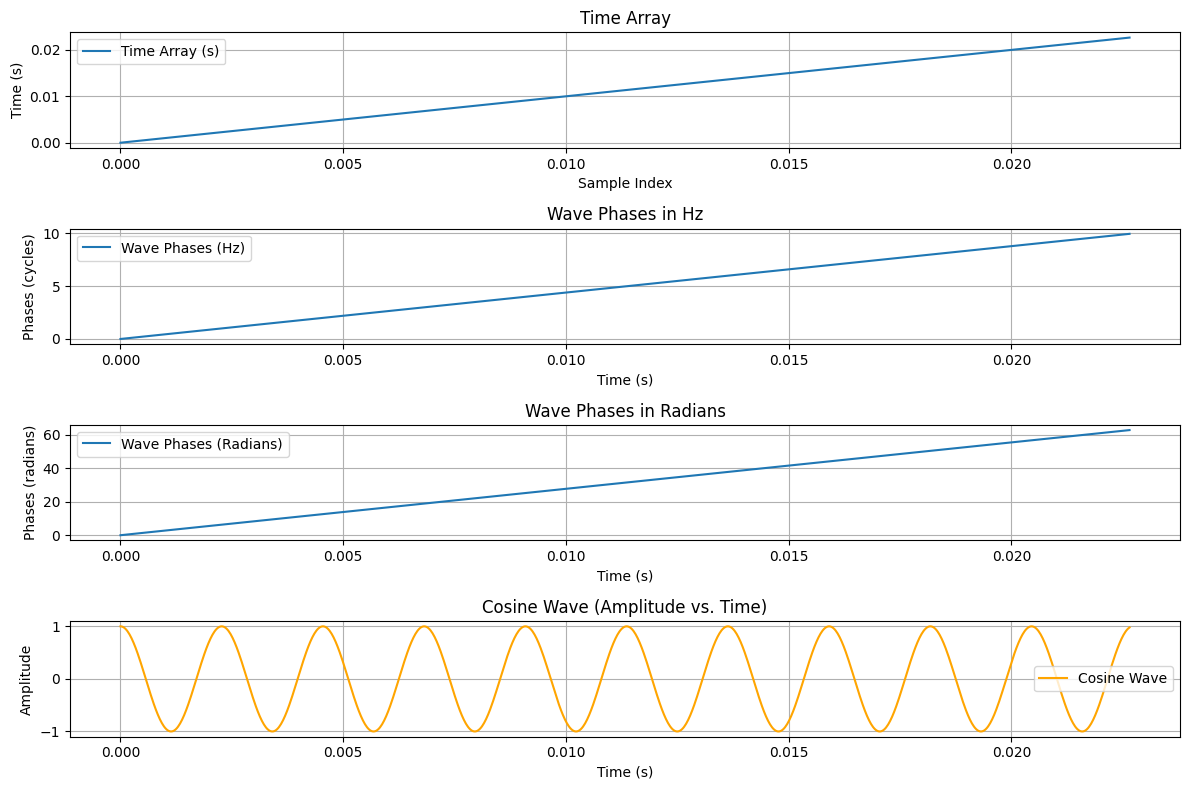

In [27]:
# Parameters
sampling_rate = 44100
frequency = 440
duration = 1.5
frames = int(duration * sampling_rate)

# Arrays
time_arr = np.linspace(0, duration, frames)
wave_phases_in_freq_Hz_time_arr = frequency * time_arr
wave_phases_in_radians_time_arr = 2 * np.pi * frequency * time_arr
cos_wave_phases_in_radians_time_arr = np.cos(2 * np.pi * frequency * time_arr)

# Visualization
plt.figure(figsize=(12, 8))

# Time Array
plt.subplot(4, 1, 1)
plt.plot(time_arr[:1000], time_arr[:1000], label="Time Array (s)")
plt.title("Time Array")
plt.xlabel("Sample Index")
plt.ylabel("Time (s)")
plt.legend()
plt.grid()

# Wave Phases in Hz
plt.subplot(4, 1, 2)
plt.plot(time_arr[:1000], wave_phases_in_freq_Hz_time_arr[:1000], label="Wave Phases (Hz)")
plt.title("Wave Phases in Hz")
plt.xlabel("Time (s)")
plt.ylabel("Phases (cycles)")
plt.legend()
plt.grid()

# Wave Phases in Radians
plt.subplot(4, 1, 3)
plt.plot(time_arr[:1000], wave_phases_in_radians_time_arr[:1000], label="Wave Phases (Radians)")
plt.title("Wave Phases in Radians")
plt.xlabel("Time (s)")
plt.ylabel("Phases (radians)")
plt.legend()
plt.grid()

# Cosine Wave
plt.subplot(4, 1, 4)
plt.plot(time_arr[:1000], cos_wave_phases_in_radians_time_arr[:1000], label="Cosine Wave", color="orange")
plt.title("Cosine Wave (Amplitude vs. Time)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


- The first three plots show how the phase evolves over time, which is useful for understanding the structure of the wave in terms of cycles or radians.
- The cosine wave plot translates those phases into amplitudes, providing a clear picture of the sound wave you are generating.

- time_arr: This represents the linearly spaced time points. A simple plot of this array will show a straight line.
- wave_phases_in_freq_Hz_time_arr: These are the wave phases in cycles (in Hz). The plot will show a linear increase in cycles over time.
- wave_phases_in_radians_time_arr: These are the wave phases in radians. The plot will also show a linear increase, but scaled up by 2𝜋, since radians represent the angular measure.
- cos_wave_phases_in_radians_time_arr: This represents the cosine wave amplitudes. The plot will show an oscillating wave (cosine curve) with a frequency of 440 Hz.

- Time Array (Linear): A straight line indicating time progresses linearly.
- Wave Phases in Hz (Linear): A linearly increasing graph showing the wave's phase in cycles as time progresses.
- Wave Phases in Radians (Linear): Another linearly increasing graph, but the slope is scaled by 2π, as radians represent angular cycles.
- Cosine Wave (Oscillating): A cosine wave oscillating between -1 and 1, representing the actual wave amplitude at each time point.

In [28]:
cos_wave_time_arr = np.cos(2*np.pi*frequency*np.linspace(0,duration, frames))

In [29]:
cos_wave_time_arr

array([1.        , 0.99803561, 0.99215014, ..., 0.99215014, 0.99803561,
       1.        ])

In [30]:
cos_wave_time_arr.shape

(66150,)

In [31]:
cos_wave_time_arr[66149]

1.0

### Cosine wave oscillating at 440 Hz for the specified duration

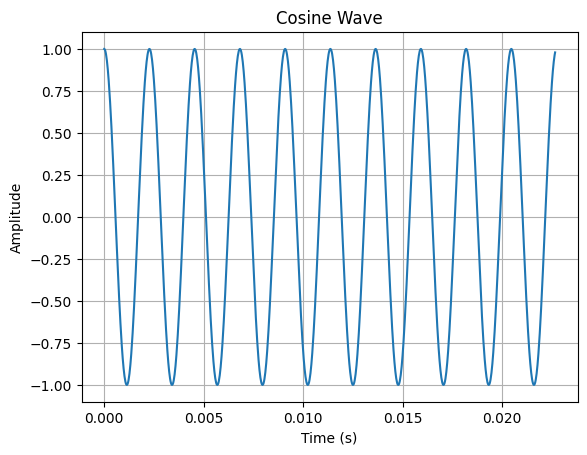

In [32]:
time_arr = np.linspace(0, duration, frames)  # Time array
cos_wave = np.cos(2 * np.pi * frequency * time_arr)  # Cosine wave

plt.plot(time_arr[:1000], cos_wave[:1000])  # Plot the first 1000 samples
plt.title("Cosine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()